In [14]:
from flask import Flask, render_template, request
import pandas as pd
import snscrape.modules.twitter as sntwitter

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/result', methods=['POST'])
def result():
    # Get user input from the form
    topic = request.form['topic']
    location = request.form['location']
    start_date = request.form['start_date']
    end_date = request.form['end_date']
    max_tweets = int(request.form['max_tweets'])

    # Create query for snscrape
    query = f'({topic}) near:"{location}" lang:en until:{end_date} since:{start_date} -filter:links -filter:retweet'

    # Create empty list to store tweets
    tweets_list = []

    # Use snscrape to scrape tweets
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i >= max_tweets:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.retweetCount, tweet.viewCount])

    # Create a Pandas DataFrame from the list of tweets
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Retweet', 'Views'])
    tweets_df['Datetime'] = tweets_df['Datetime'].dt.tz_localize(None)

    # Render the results template with the DataFrame as a parameter
    return render_template('result.html', tweets=tweets_df.to_html(index=False))

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [15]:
%tb

UsageError: Line magic function `%t` not found.


In [6]:
from flask import Flask, render_template, request
import pandas as pd
import snscrape.modules.twitter as sntwitter
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import base64
from io import BytesIO

In [7]:
# Get user input from the form
topic = 'Strike'
location = 'London'
start_date = '2023-01-01'
end_date = '2023-03-12'
max_tweets = 100

In [8]:
# Create query for snscrape
query = f'({topic}) near:"{location}" lang:en until:{end_date} since:{start_date} -filter:links -filter:retweet'

# Create empty list to store tweets
tweets_list = []

# Use snscrape to scrape tweets
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i >= max_tweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.retweetCount, tweet.viewCount])

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=%28Strike%29+near%3A%22London%22+lang%3Aen+until%3A2023-03-12+since%3A2023-01-01+-filter%3Alinks+-filter%3Aretweet&tweet_search_mode=live&count=20&query_source=spelling_expansion

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=%28Strike%29+near%3A%22London%22+lang%3Aen+until%3A2023-03-12+since%3A2023-01-01+-filter%3Alinks+-filter%3Aretweet&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

In [57]:
# Create a Pandas DataFrame from the list of tweets
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Retweet', 'Views'])

In [58]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username,Retweet,Views
0,2023-03-11 23:37:39+00:00,1634700139888607233,@SteveBarclay @BMA_JuniorDocs @Telegraph 98% o...,allan_xu,0,65
1,2023-03-11 23:34:38+00:00,1634699380237238273,@TortoiseGatsby @MarlLake Strike a pose….,joglynn70,0,19
2,2023-03-11 23:31:30+00:00,1634698595164143616,@SteveBarclay @BMA_JuniorDocs @Telegraph You k...,allan_xu,1,734
3,2023-03-11 23:30:26+00:00,1634698322798690306,@LouiseScott1377 Tories brought politics into ...,SFenwic0612800,0,15
4,2023-03-11 23:24:06+00:00,1634696731936931845,@PedroSu19680421 @Iromg @BBCSport @GaryLineker...,smsr2019,0,11


In [59]:
tweets_df['Datetime'] = tweets_df['Datetime'].dt.tz_localize(None)
tweets_df =tweets_df.sort_values(by=['Views'], ascending=False)

In [60]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username,Retweet,Views
26,2023-03-11 22:31:59,1634683615354187776,Three games in on Match of the Day and haven't...,iainmartin1,5,10471
29,2023-03-11 22:25:49,1634682062790639621,Wait the commentators for MOTD has gone on str...,MilageUK,2,8194
90,2023-03-11 19:11:17,1634633107260293120,When will Steve Barclay and Gillian Keegan wak...,fifisyms,4,8124
92,2023-03-11 19:08:38,1634632439459983361,"Savage for Palace, a reminder that tiny detail...",stighefootball,0,5999
84,2023-03-11 19:24:01,1634636313486938116,"Nah even the footballers are on strike now, En...",OteghaUwagba,1,3217


In [61]:
tweets_df10 = tweets_df.head(10)

In [62]:
tweets_df10 

,Datetime,Tweet Id,Text,Username,Retweet,Views
26,2023-03-11 22:31:59,1634683615354187776,Three games in on Match of the Day and haven't...,iainmartin1,5,10471
29,2023-03-11 22:25:49,1634682062790639621,Wait the commentators for MOTD has gone on str...,MilageUK,2,8194
90,2023-03-11 19:11:17,1634633107260293120,When will Steve Barclay and Gillian Keegan wak...,fifisyms,4,8124
92,2023-03-11 19:08:38,1634632439459983361,"Savage for Palace, a reminder that tiny detail...",stighefootball,0,5999
84,2023-03-11 19:24:01,1634636313486938116,"Nah even the footballers are on strike now, En...",OteghaUwagba,1,3217
95,2023-03-11 19:02:10,1634630812158111744,Never needed a holiday as much as now. So obvs...,Stef_W,1,1379
38,2023-03-11 21:50:30,1634673177694445569,@dex_eve @GeorgeWHerbert I find the idea of 'w...,shashj,1,1216
13,2023-03-11 22:55:14,1634689467398119424,"@BBCSport Disappointed that no presenter, pund...",JVenicombe,0,1081
73,2023-03-11 20:06:21,1634646963533619201,@Iniqu1ty You need orbs in strikes? You strugg...,THFCKels,0,1045
31,2023-03-11 22:24:41,1634681778601435136,Looks like The live band that usually plays th...,JayMahmud,0,932


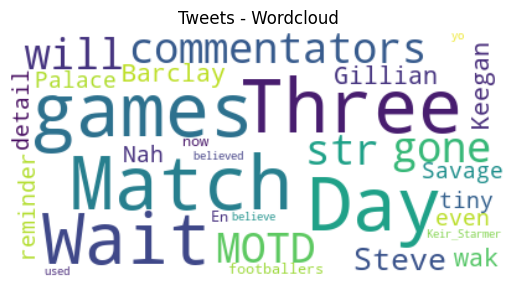

In [70]:
# Generate word cloud
w_tweets = tweets_df['Text']
stop_words = ["https", "co", "RT", topic] + list(STOPWORDS)
tweets_wordcloud = WordCloud(max_font_size=60, max_words=30, background_color="white", stopwords = stop_words).generate(str(w_tweets))
plt.figure()
plt.title("Tweets - Wordcloud")
plt.imshow(tweets_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save word cloud image to file
# wordcloud.to_file('static/wordcloud.png')


In [68]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [69]:
plt.show()

In [ ]:
# Generate word cloud
w_tweets = tweets_df['Text']
stop_words = ["https", "co", "RT", topic] + list(STOPWORDS)
tweets_wordcloud = WordCloud(max_font_size=60, max_words=30, background_color="white", stopwords = stop_words).generate(str(w_tweets))


In [74]:
# Save wordcloud image to a file
img_file = BytesIO()
tweets_wordcloud.to_file(img_file, format='png')
img_file.seek(0)
img_data = base64.b64encode(img_file.getvalue()).decode('utf-8')

TypeError: to_file() got an unexpected keyword argument 'format'

In [75]:
from multiprocessing import Process, Queue

In [1]:
from flask import Flask, render_template, request, url_for
import pandas as pd
import snscrape.modules.twitter as sntwitter
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import re

app = Flask(__name__)

@app.route('/')
def home():
    # Render the home template
    return render_template('home.html')

@app.route('/result', methods=['POST'])
def result():
    # Get user input from the form
    try:
        topic = request.form['topic']
        location = request.form['location']
        start_date = request.form['start_date']
        end_date = request.form['end_date']
        max_tweets = int(request.form['max_tweets'])
    except:
        # If the user input is invalid, render the error template
        return render_template('error.html', message='Invalid input')

    # Create query for snscrape
    query = f'({topic}) near:"{location}" lang:en until:{end_date} since:{start_date} -filter:links -filter:retweet'

    # Create empty list to store tweets
    tweets_list = []

    # Use snscrape to scrape tweets
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i >= max_tweets:
            break
        tweets_list.append([tweet.date, tweet.rawContent, tweet.user.username, tweet.viewCount])
        
    # Create a Pandas DataFrame from the list of tweets
    tweets_df = pd.DataFrame(tweets_list, columns=['Date', 'Text', 'Username', 'Views'])
    tweets_df['Date'] = tweets_df['Date'].dt.date
    tweets_df =tweets_df.sort_values(by=['Views'], ascending=False)
    
    # Check if there are any tweets
    if tweets_df.empty:
        # If there are no tweets, render the error template
        return render_template('error.html', message='No tweets found')

    # Get the top 10 most viewed tweets
    tweets_df10 = tweets_df.head(10)
    
    # Generate word cloud
    w_tweets = tweets_df['Text'].str.replace('(\@\w+.*?)',"")
    w_tweets = w_tweets.str.replace('(\#\w+.*?)',"")
    stop_words = ["https", "co", "RT", topic.lower()] + list(STOPWORDS)
    wds_tweets = re.sub(r'\b\w{1,3}\b', '', str(w_tweets))
    tweets_wordcloud = WordCloud(width=700, height=400,max_font_size=90, max_words=40, background_color="white", stopwords = stop_words).generate(wds_tweets.lower())

    # Save word cloud as image file
    tweets_wordcloud.to_file('static/wordcloud.png')

    # Render the results template with the DataFrame as a parameter        
    return render_template('result.html', topic=topic, tweets=tweets_df10.to_html(index=False))

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\temit\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
snscrape/modules/twitter.py

NameError: name 'snscrape' is not defined

In [10]:
def _unset_guest_token(self):
del self._apiHeaders['x-guest-token']

def _check_api_response(self, r):
    if r.status_code == 429:
    if r.status_code in (403, 429):
        self._unset_guest_token()
        self._ensure_guest_token()
        return False, 'rate-limited'
        return False, f'blocked ({r.status_code})'
if r.headers.get('content-type', '').replace(' ', '') != 'application/json;charset=utf-8':
    return False, 'content type is not JSON'
    if r.status_code != 200:

IndentationError: expected an indented block (120265517.py, line 2)

In [13]:
 import snscrape.modules.twitter as sntwitter
 import pandas as pd


 tweets_list2 = []



 for i, tweet in enumerate(sntwitter.TwitterSearchScraper('vaccine top = True since:2021-01-01 until:2021-05-31').get_items()):
 
    attribute_list = [tweet.date, tweet.id, tweet.user.username, tweet.user.id, tweet.user.displayname, tweet.user.location,  
                      tweet.user.followersCount, tweet.user.friendsCount, tweet.user.statusesCount, 
                      tweet.retweetedTweet, tweet.content, tweet.lang, tweet.mentionedUsers
                      ]    

    tweets_list2.append(attribute_list)

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=vaccine+top+%3D+True+since%3A2021-01-01+until%3A2021-05-31&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_ed

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=vaccine+top+%3D+True+since%3A2021-01-01+until%3A2021-05-31&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

In [5]:
from snscrape.modules.twitter import TwitterTweetScraperMode, TwitterTweetScraper
import json, time
from alive_progress import alive_bar

with open("twitterids") as ids:
    ids = ids.read().strip("\n").split("\n")
try:
    with open("finished") as finished_ids:
        finished = json.load(finished_ids)
except IOError:
    finished = []

def writejson(finished, ourjson):
    to_write = ""
    for tweet in ourjson:
        to_write += f"{tweet}\n"
    with open("tweets.jsonl", "a+") as fil:
        fil.write(to_write)
    with open("finished", "w+") as fin:
        fin.write(json.dumps(finished))

with alive_bar(total=len(ids)) as bar:
    for identifier in ids:
        if int(identifier) in finished:
            print(f"{identifier} already in archive file; skipping")
            bar()
            continue
        ourjson = []
        bar.text(identifier)
        scraper = TwitterTweetScraper(identifier, mode=TwitterTweetScraperMode.RECURSE)
        for tweet in scraper.get_items():
            tweet["archivist_data"] = {"time": time.time()}
            tweetdata = tweet.json()
            finished.append(tweet.id)
            ourjson.append(tweetdata)
        writejson(finished, ourjson)
        bar()

FileNotFoundError: [Errno 2] No such file or directory: 'twitterids'